# BRAIN TUMOR MULTI CLASS CLASSIFICATION PROBLEM 

#### Now let us print an image from one of the classes of the training data set 

In [4]:
# let us pick up an image , we will do this by picking up its path
image="C:\IIT B\Brain Tumor CNN\Augmented Data\Training\glioma\glioma_1126_743963.png"

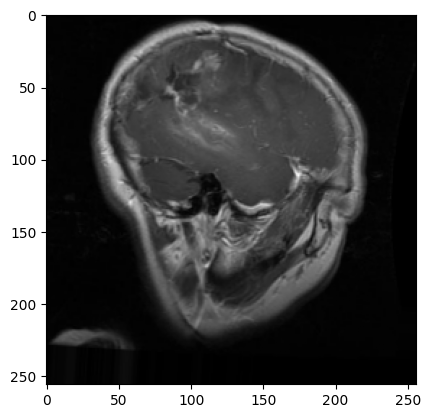

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
image=imread(image) # this reads the image from the link
plt.imshow(image)
# This is the image of glioma tumor

In [6]:
image.shape

(256, 256, 3)

## NOTE THE FACT THAT I HAVE NORMALISED AND RESHAPED ALL THE IMAGES OF THE TRAINING AND TESTING DATA SET DURING THE DATA AUGMENTATION PART

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
# let us get the training data set 
train_ds=keras.utils.image_dataset_from_directory(directory="C:\IIT B\Brain Tumor CNN\Augmented Data\Training",
                                                  labels='inferred' ,#The labels are inferred from the directory structure. The directory names at the top level are treated as the class names
                                                  label_mode='categorical'  , # 'int' if the labelling of the category is integral , otherwise this
                                                  batch_size=32, # we will not set the batch size later , mini batch gradient descent 
                                                  image_size=(256,256)
                                                 )

Found 10000 files belonging to 4 classes.


In [9]:
validation_ds=keras.utils.image_dataset_from_directory(directory="C:\IIT B\Brain Tumor CNN\Augmented Data\Testing",
                                                  labels='inferred' ,#The labels are inferred from the directory structure. The directory names at the top level are treated as the class names
                                                  label_mode='categorical'  ,
                                                  batch_size=32,
                                                  image_size=(256,256)
                                                 )

Found 1311 files belonging to 4 classes.


# CREATING THE CNN MODEL 

In [10]:
import numpy as np
from keras import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.metrics import Recall,Precision
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(5,5),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(128,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(128,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(256,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))



model.add(Dense(4,activation='softmax'))

model.summary()

C:\IIT B\Python Virtual Env\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 252, 252, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 84, 84, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 80, 80, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 23, 23, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,300,932 (4.96 MB)

 Trainable params: 1,300,932 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

## A total of 1,059,396 trainable parameters 

In [12]:
# Early Stopping 
call= EarlyStopping(monitor='val_accuracy',
                         restore_best_weights=True,
                         patience=25,
                         min_delta=0.001,
                         verbose=1,
                         mode='auto'
                     
                         
                    )

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history=model.fit(train_ds,epochs=60,validation_data=validation_ds,verbose=1,callbacks=call)

Epoch 1/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 198s 628ms/step - accuracy: 0.3315 - loss: 1.7886 - val_accuracy: 0.5744 - val_loss: 0.9685
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 202s 645ms/step - accuracy: 0.5835 - loss: 0.9426 - val_accuracy: 0.6384 - val_loss: 0.8189
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 202s 646ms/step - accuracy: 0.6883 - loss: 0.7201 - val_accuracy: 0.7460 - val_loss: 0.6314
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 202s 645ms/step - accuracy: 0.7614 - loss: 0.5706 - val_accuracy: 0.7399 - val_loss: 0.5557
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 198s 633ms/step - accuracy: 0.8096 - loss: 0.4821 - val_accuracy: 0.7941 - val_loss: 0.4468
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 641ms/step - accuracy: 0.8494 - loss: 0.3960 - val_accuracy: 0.8116 - val_loss: 0.3847
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 198s 631ms/step - accuracy: 0.8468 - loss: 0.3973 - val_accuracy: 0.7750 - val_loss: 0.4949
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 643ms/step - accuracy: 0.8495 -

In [15]:
from sklearn.metrics import accuracy_score

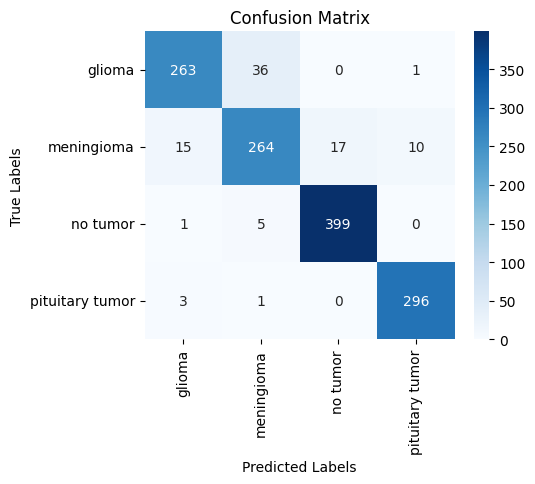

In [16]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define label mapping
label_mapping = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no tumor',
    3: 'pituitary tumor'
}

# Function to extract labels and predictions
def extract_labels_and_predictions(dataset, model):
    true_labels = []
    predictions = []
    
    for images, labels in dataset:
        true_labels.append(labels.numpy())
        preds = model(images, training=False)
        predictions.append(preds.numpy())
    
    true_labels = np.concatenate(true_labels, axis=0)
    predictions = np.concatenate(predictions, axis=0)
    
    return true_labels, predictions

# Extract labels and predictions
Y_true, Y_pred = extract_labels_and_predictions(validation_ds, model)

# Convert one-hot encoded true labels to integer class labels
Y_true_classes = np.argmax(Y_true, axis=1)

# Convert predicted probabilities to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_true_classes, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[label_mapping[i] for i in range(len(label_mapping))],
            yticklabels=[label_mapping[i] for i in range(len(label_mapping))])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [17]:
from sklearn.metrics import accuracy_score,f1_score
print('Accuracy:',accuracy_score(Y_true_classes, Y_pred_classes),'F1_score:',f1_score(Y_true_classes, Y_pred_classes,average='weighted'))

Accuracy: 0.9321128909229596 F1_score: 0.9316358443534475


In [18]:
# misclassification in no tumor category
precison

# Comments 

In [19]:
'''  
   1- Maybe dont flip the images horizontally and vertically during data augmentation, i am sure that it is creating problems and it is not cat vs dog 

'''
# I worked on this one and didnt apply strong augmentation because it might -vely effect or may confuse the model during training 
# This is becuase usually MRIs are taken in a certain format , they arent certainly not flipped and the angle of the head is also fixed 
# There could be minor differences depedning on the size of the head of the patient and minor positional differences but nothing very major 
# MRIs are taken in a very strict postion so as to get clear images of the things which we have inside the head

'  \n   1- Maybe dont flip the images horizontally and vertically during data augmentation, i am sure that it is creating problems and it is not cat vs dog \n\n'

In [22]:
'''
model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Dense(4,activation='softmax'))

model.summary()
# best accuracy 95.27-96.00 loss-0.1911
'''

"\nmodel=Sequential()\n\nmodel.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2),strides=2))\n\n\nmodel.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2),strides=2))\n\n\nmodel.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2),strides=2))\n\nmodel.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2),strides=2))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(32,activation='relu'))\nmodel.add(BatchNormalization())\n#model.add(Dropout(0.1))\n\nmodel.add(Dense(64,activation='relu'))\nmodel.add(BatchNormalization())\n#model.add(Dropout(0.1))\n\nmodel.add(Dense(128,activation='relu'))\nmodel.add(BatchNormalization())

## Best accuracy and f1 of about 96 percent and precision for 'no tumor' of about 98 percent 